# Preperación de Entorno de Trabajo

Para facilitar el desarrollo de ejercicios prácticos, es importante mantener una organización sistemática de los archivos y recursos utilizados. Este documento proporciona una guía para facilitar la gestión de distintos tipos de archivos, adaptándose tanto a entornos de trabajo en Google Drive como a configuraciones locales con Python y notebooks.

La estructura propuesta implica la creación de una carpeta principal que almacena varias subcarpetas específicas para diferentes tipos de archivos, como fuentes, datos, modelos y otros archivos relevantes. Esta organización no solo mejora la eficiencia en el manejo de archivos sino que también facilita la colaboración y el seguimiento de proyectos.

---

## Montar la carpeta de Google Drive y definir constantes para trabajar

El código que sigue a continuación está diseñado para identificar el entorno de trabajo actual (ya sea una máquina virtual de Colab o un entorno local de IPython) y configurar las variables de ruta necesarias para acceder a las diferentes carpetas donde se almacenan los archivos.

El script comienza verificando si el entorno es Google Colab. Si es así, monta Google Drive y define las rutas a las carpetas específicas dentro de este. En caso contrario, asume un entorno local y configura las rutas de acuerdo a la estructura local.

Además, el código asegura que los archivos auxiliares en formato .py sean accesibles agregando la ruta de la carpeta de fuentes al sistema de búsqueda de Python.

In [21]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR  = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR    = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '/content/drive/MyDrive/Colab Notebooks/MODELOS/'    # carpeta donde se encuentran los modelos
    ARCHIVOS_DIR = '/content/drive/MyDrive/Colab Notebooks/ARCHIVOS/'   # carpeta recuperar o copiar archivos
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
    ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Ejercicio de Clasificación de Hojas


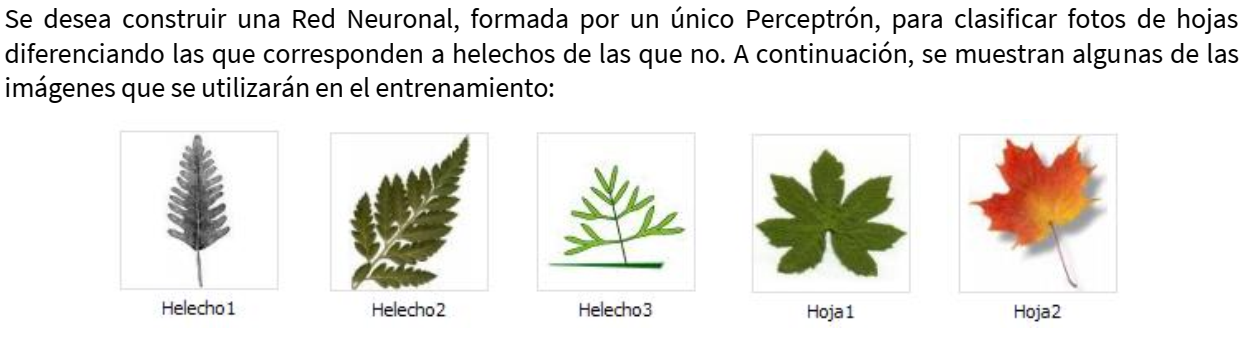
---
**Apertura de archivos con detección de codificación de los caracteres**

In [22]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'hojas.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)


,Perimetro,Area,Clase
0,667.997041,3793,Hoja
1,784.246825,2574,Helecho
2,367.747258,3582,Hoja
3,901.595021,5068,Helecho
4,949.175757,12216,Hoja
5,763.269119,980,Helecho
6,197.580736,3370,Hoja
7,799.619408,1669,Helecho
8,452.475180,3585,Hoja
9,1564.482323,2964,Helecho


### Gráfico por clase

Clase
Hoja       7
Helecho    5
Name: count, dtype: int64


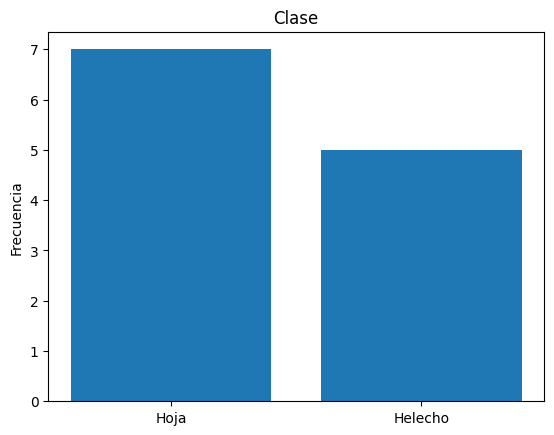

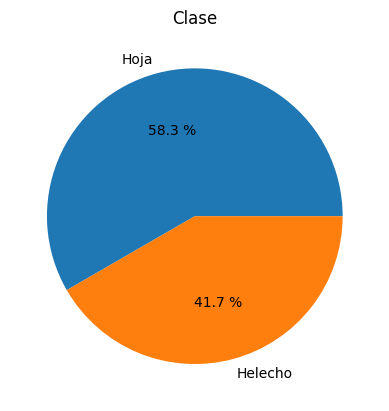

In [27]:
### Gráfico por Clase

target = "Clase"
barras = df[target].value_counts()
print(barras)

plt.figure()
N = len(barras)
plt.bar(np.arange( N ), barras)  # Gráfico de barras
plt.title(target)      # Colocamos el título
plt.ylabel('Frecuencia')
# Colocamos las etiquetas del eje x
plt.xticks(np.arange( N ), barras.index)
plt.show()


plt.pie(barras,labels=barras.index, autopct="%0.1f %%")
plt.title(target)
plt.show()


### Separa características de entrenamiento y clase a predecir

In [28]:
# nuevo dataframe "datos" sin la columna "clase"
datos = df.drop('Clase',axis=1)

# extrae las clases del dataframe de forma que 'Helecho'=> 1 y 'Hoja' => 0
etiquetas = (df['Clase']=='Helecho')*1

---
Utilice los ejemplos del archivo hojas.csv para entrenar un perceptrón que permita reconocer cuando se trata de una hoja de helecho. Utilice una velocidad de aprendizaje (parámetro alfa) de 0.01 y una máxima
cantidad de iteraciones MAX_ITE=300.

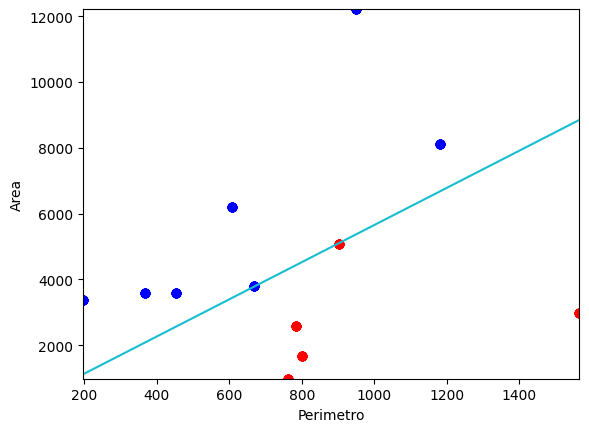

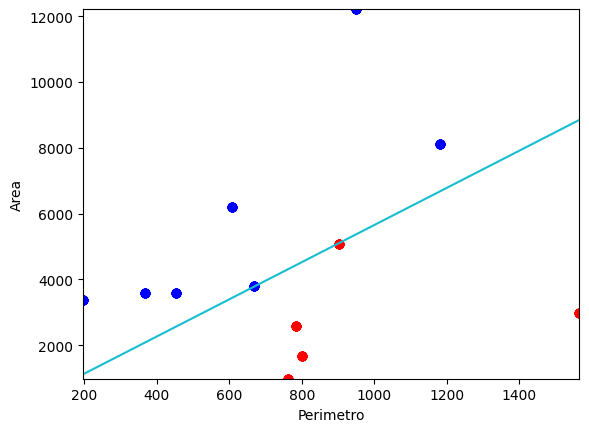

In [25]:
# importa perceptron de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassPerceptron import Perceptron
import numpy as np

alfa = 0.01     # velocidad de aprendizaje
max_itera = 300 # maxima iteración
dibujar = True

# crea perceptrón con parámetros indicados
modelo = Perceptron(alpha=alfa, n_iter=max_itera, draw=dibujar, title=datos.columns)

modelo.fit(datos.values, etiquetas)   # entrena

# Prediccion
y = modelo.predict(datos)


### Muestra Información del entrenamiento
Muestra Efectividad (Accuracy), iteraciones que requirió el modelo en el entrenamiento y pesos del modelo.
También realiza un gráfico con el error cometido en cada iteración



Accuracy        : 100.00
Iteraciones     : 32
pesos del modelo: [ 0.02788031 -0.03139165]
bias del modelo :  -0.002456321419544636


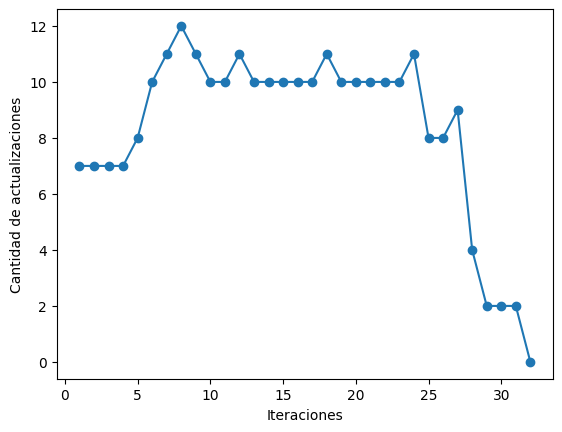

In [35]:
# Resultados - Accuracy
# = (y==etiquetas).sum()*100 / etiquetas.shape[0]
acc = (y==etiquetas).sum()*100 / len(etiquetas)

# otra forma de calcular lo acc
# acc = np.sum(y==etiquetas)*100 / len(etiquetas)
iter = len(modelo.errors_)

print('Accuracy        : %6.2f' % acc)
print('Iteraciones     : %d' % iter)

print('pesos del modelo:', modelo.w_)
print('bias del modelo : ',modelo.b_)

# Grafico de errores
import matplotlib.pyplot as plt

plt.plot(range(1, len(modelo.errors_) + 1), modelo.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()


---
## Repetición de Entrenamiento con Datos Normalizados

Utiliza normalización MinMax

In [29]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

datos = scaler.fit_transform(datos)


### Reentrenamiento del Modelo con Datos Normalizados



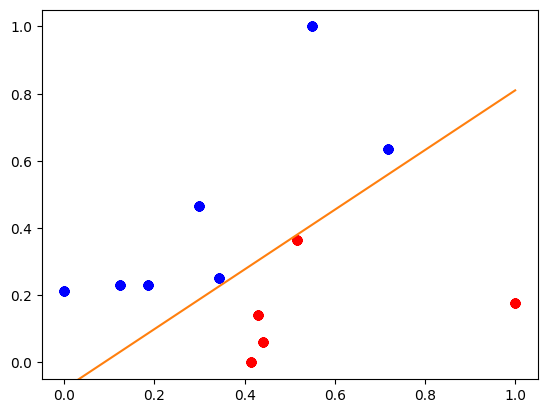

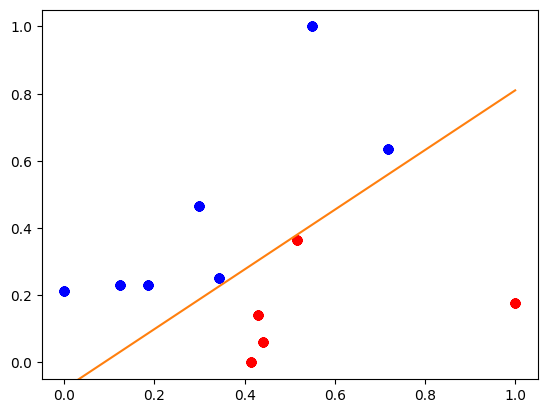

In [32]:
# crea perceptrón con parámetros indicados
modelo = Perceptron(alpha=alfa, n_iter=max_itera, draw=dibujar, title=datos)

modelo.fit(datos, etiquetas)   # entrena

# Prediccion
y = modelo.predict(datos)

### Muestra Información del entrenamiento
Esta vez muestra el resultado con datos de entrenamiento normalizado

Accuracy        : 100.00
Iteraciones     : 32
pesos del modelo: [ 0.02788031 -0.03139165]
bias del modelo :  -0.002456321419544636


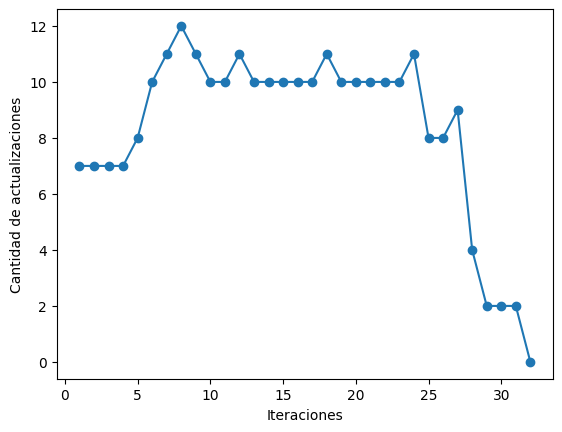

In [34]:
# Resultados - Accuracy
# = (y==etiquetas).sum()*100 / etiquetas.shape[0]
acc = (y==etiquetas).sum()*100 / len(etiquetas)

# otra forma de calcular lo acc
# acc = np.sum(y==etiquetas)*100 / len(etiquetas)
iter = len(modelo.errors_)

print('Accuracy        : %6.2f' % acc)
print('Iteraciones     : %d' % iter)

print('pesos del modelo:', modelo.w_)
print('bias del modelo : ',modelo.b_)

# Grafico de errores
import matplotlib.pyplot as plt

plt.plot(range(1, len(modelo.errors_) + 1), modelo.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()